import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df.head()

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv("netflix_titles.csv")

In [17]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [19]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [20]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [21]:
df.dropna(subset=['type', 'title'], inplace=True)


In [22]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')


<Axes: title={'center': 'Movies vs. TV Shows'}, xlabel='type'>

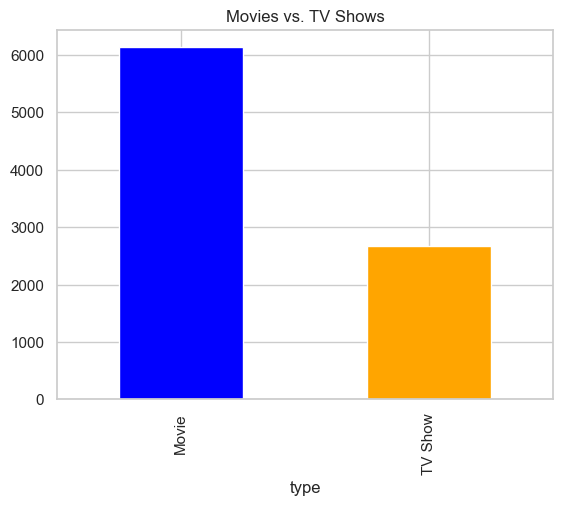

In [23]:
df['type'].value_counts().plot(kind='bar', title="Movies vs. TV Shows", color=['blue', 'orange'])


<Axes: title={'center': 'Top 10 Genres'}, ylabel='listed_in'>

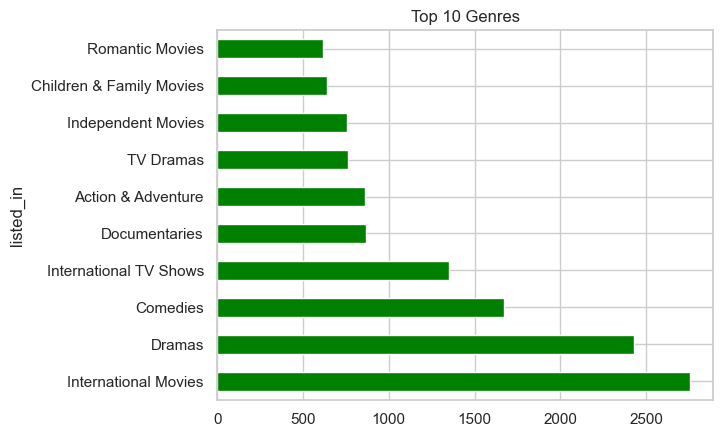

In [24]:
genres = df['listed_in'].str.split(', ').explode()
genres.value_counts().head(10).plot(kind='barh', title="Top 10 Genres", color='green')


<Axes: title={'center': 'Content Release Trends Over Years'}, xlabel='release_year'>

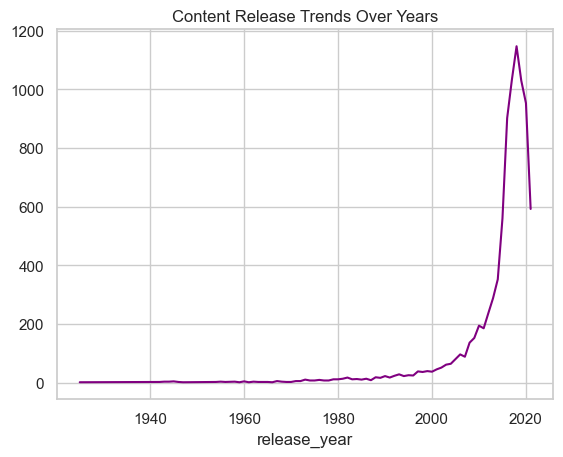

In [25]:
df['release_year'].value_counts().sort_index().plot(kind='line', title="Content Release Trends Over Years", color='purple')


<Axes: title={'center': 'Top 10 Countries with Content'}, xlabel='country'>

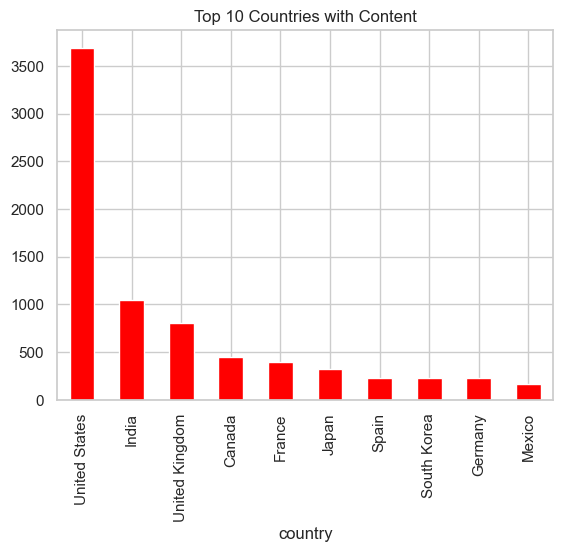

In [26]:
countries = df['country'].dropna().str.split(', ').explode()
countries.value_counts().head(10).plot(kind='bar', title="Top 10 Countries with Content", color='red')


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


/var/folders/yl/820b578904n_9t_x0trhd6zh0000gn/T/ipykernel_27697/3567506604.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


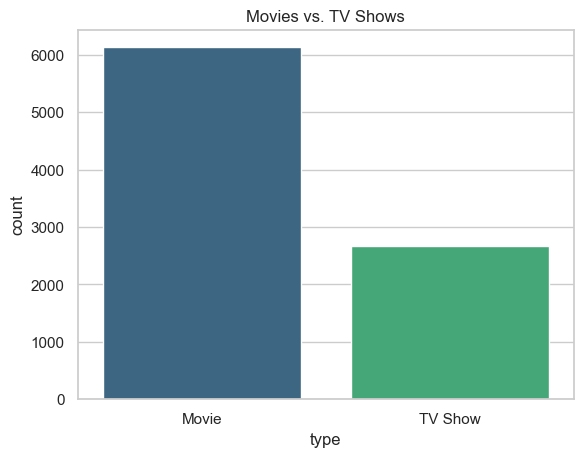

In [28]:
sns.countplot(data=df, x='type', palette='viridis')
plt.title("Movies vs. TV Shows")
plt.show()

In [29]:
df.to_csv("cleaned_netflix_data.csv", index=False)


In [30]:
from textblob import TextBlob

# Perform sentiment analysis on titles or descriptions
df['sentiment'] = df['title'].apply(lambda title: TextBlob(str(title)).sentiment.polarity)

# Categorize sentiment
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Show sentiment distribution
print(df['sentiment_category'].value_counts())


sentiment_category
Neutral     7169
Positive    1038
Negative     600
Name: count, dtype: int64


/var/folders/yl/820b578904n_9t_x0trhd6zh0000gn/T/ipykernel_27697/2546027657.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_category', palette='coolwarm')


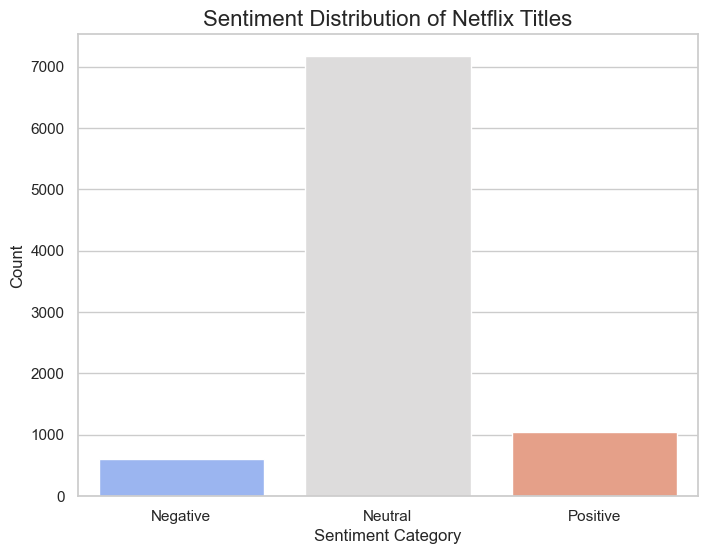

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Plot the sentiment distribution (without 'hue' for simple countplot)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment_category', palette='coolwarm')

# Add title and labels
plt.title('Sentiment Distribution of Netflix Titles', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()


In [32]:
# Extract numeric duration values for movies
df['duration_numeric'] = df['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'min' in x else None)

# Analyze correlation
df[['release_year', 'duration_numeric']].dropna().corr()


,release_year,duration_numeric
release_year,1.000000,-0.206285
duration_numeric,-0.206285,1.000000


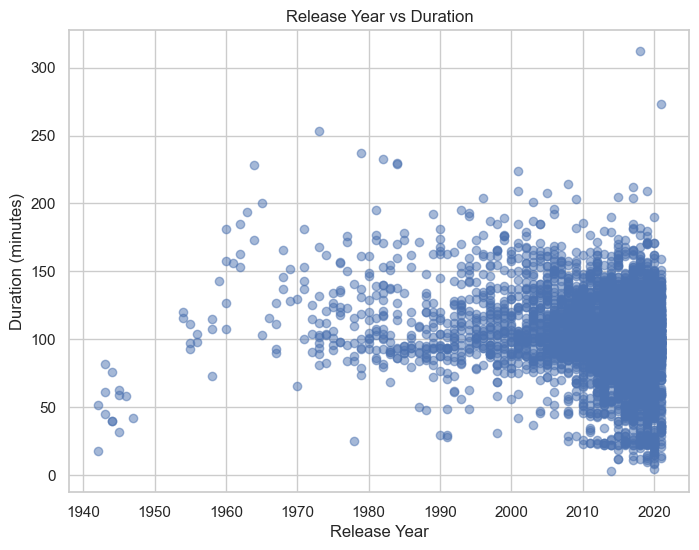

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['release_year'], df['duration_numeric'], alpha=0.5)
plt.title("Release Year vs Duration")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.show()


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Step 2: Inspect your dataset to ensure the correct columns (title and description)
print(df.columns)  # Check the column names

# Step 4: Vectorize the 'description' column using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['description'])  # Make sure 'description' is the correct column name

# Step 5: Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 6: Convert the cosine similarity matrix into a DataFrame for better visualization
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['title'], columns=df['title'])

# Step 7: Display the similarity matrix (optional)
print(cosine_sim_df)

# Step 8: Recommend the most similar items for each movie/show
for i, title in enumerate(df['title']):
    similar_movies = cosine_sim_df[title].sort_values(ascending=False)[1:]  # Exclude itself
    print(f"\nMovies similar to '{title}':")
    print(similar_movies.head(5))  # Top 5 similar movies


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'sentiment', 'sentiment_category', 'duration_numeric'],
      dtype='object')
title                  Dick Johnson Is Dead  Blood & Water  Ganglands  \
title                                                                   
Dick Johnson Is Dead               1.000000          0.000   0.000000   
Blood & Water                      0.000000          1.000   0.000000   
Ganglands                          0.000000          0.000   1.000000   
Jailbirds New Orleans              0.000000          0.000   0.000000   
Kota Factory                       0.015222          0.000   0.000000   
...                                     ...            ...        ...   
Zodiac                             0.000000          0.000   0.000000   
Zombie Dumb                        0.000000          0.042   0.000000   
Zombieland                      

In [37]:
import streamlit as st
import pandas as pd

# Load your dataset
df = pd.read_csv('netflix_titles.csv')  # Replace with your dataset's path

# Create a Streamlit interface
st.title("Netflix Dataset Analysis")

# Filter data by genre
genre = st.selectbox("Select Genre", df['listed_in'].unique())
filtered_data = df[df['listed_in'].str.contains(genre, na=False)]

# Display the filtered data
st.write(filtered_data[['title', 'release_year', 'type']])



2024-11-26 15:10:20.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 15:10:20.626 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 15:10:20.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 15:10:20.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 15:10:20.639 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 15:10:20.639 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 15:10:20.640 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 15:10:20.641 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [40]:
from textblob import TextBlob

# Function to classify sentiment
def classify_sentiment(description):
    polarity = TextBlob(description).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to the 'description' column
df['sentiment_category'] = df['description'].apply(classify_sentiment)


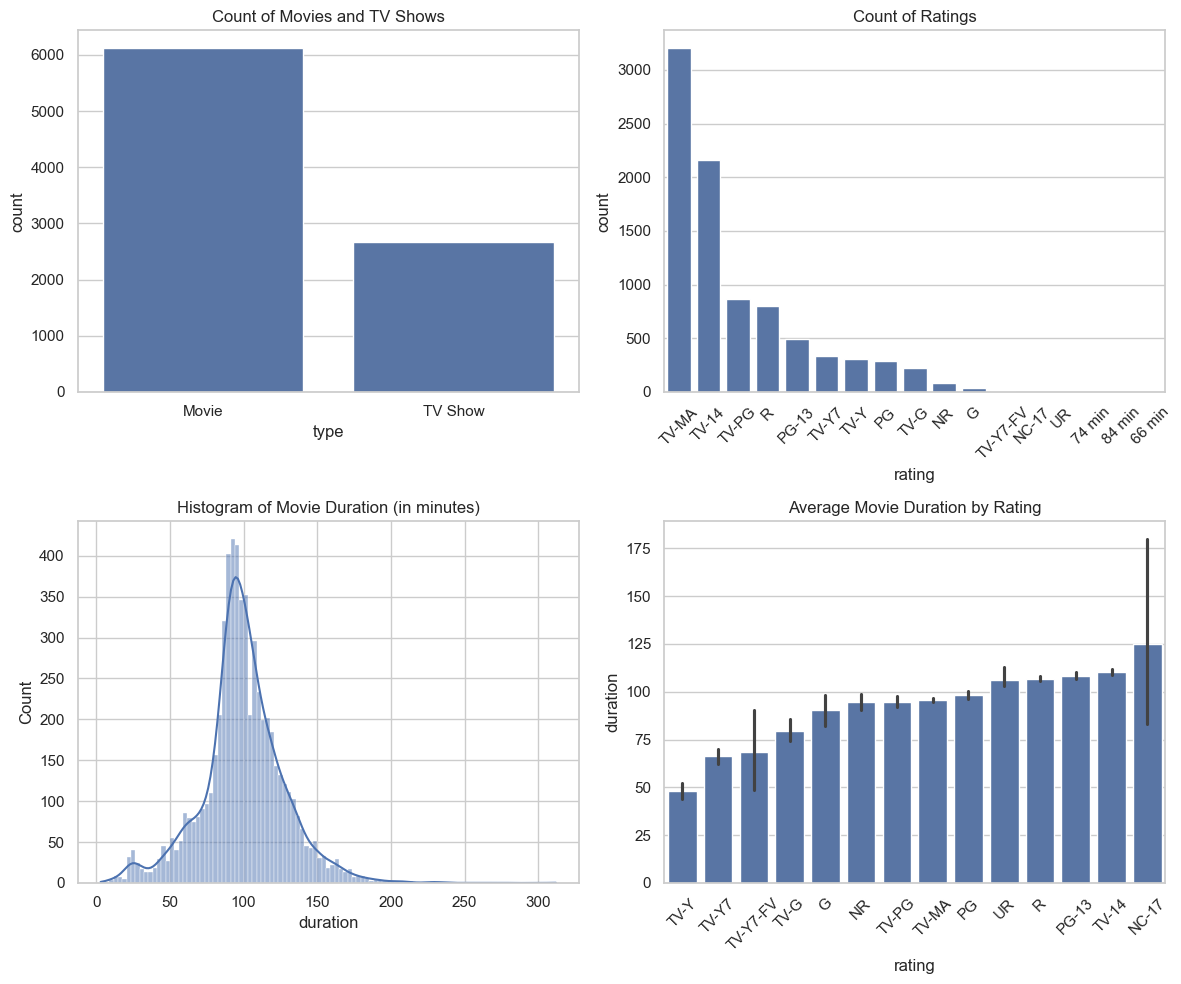

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Count of type (Movies/TV Shows)
sns.countplot(data=df, x='type', ax=ax[0, 0])
ax[0, 0].set_title("Count of Movies and TV Shows")

# Plot 2: Count of ratings (with rotated labels for clarity)
sns.countplot(data=df, x='rating', ax=ax[0, 1], order=df['rating'].value_counts().index)
ax[0, 1].set_title("Count of Ratings")
ax[0, 1].tick_params(axis='x', rotation=45)  # Rotate labels for readability

# Plot 3: Histogram of duration (movies in minutes)
sns.histplot(data=movies, x='duration', kde=True, ax=ax[1, 0])
ax[1, 0].set_title("Histogram of Movie Duration (in minutes)")

# Plot 4: Barplot for average duration by rating (movies only)
sns.barplot(data=movies, x='rating', y='duration', ax=ax[1, 1], order=movies.groupby('rating')['duration'].mean().sort_values().index)
ax[1, 1].set_title("Average Movie Duration by Rating")
ax[1, 1].tick_params(axis='x', rotation=45)  # Rotate labels for readability

# Adjust layout
plt.tight_layout()
plt.show()
